In [105]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Load and pre-process our data
data = pd.read_csv('data/cleaned_data_v2.csv')
data['hour_number'] = pd.to_datetime(data['hour_number'], format='%Y%m%d-%H', errors='coerce')
data

,hour_number_dec,hour_number,price,demand,capacity
0,2023-12-09 01:00:00,2023-12-09 01:00:00,17.79,14149,27275
1,2023-12-09 02:00:00,2023-12-09 02:00:00,14.34,13664,27333
2,2023-12-09 03:00:00,2023-12-09 03:00:00,22.23,13325,27244
3,2023-12-09 04:00:00,2023-12-09 04:00:00,17.85,13157,27133
4,2023-12-09 05:00:00,2023-12-09 05:00:00,26.74,13242,26984
...,...,...,...,...,...
2179,2024-03-08 20:00:00,2024-03-08 20:00:00,26.47,16761,25445
2180,2024-03-08 21:00:00,2024-03-08 21:00:00,24.19,16279,25990
2181,2024-03-08 22:00:00,2024-03-08 22:00:00,23.40,15620,26612
2182,2024-03-08 23:00:00,2024-03-08 23:00:00,23.10,14834,26954


In [107]:
# Encode time into integer
data = data.sort_values(by='hour_number')
data = data.set_index('hour_number')
data['time'] = np.arange(len(data.index))
data

,hour_number_dec,price,demand,capacity,time
hour_number,,,,,
2023-12-09 01:00:00,2023-12-09 01:00:00,17.79,14149,27275,0
2023-12-09 02:00:00,2023-12-09 02:00:00,14.34,13664,27333,1
2023-12-09 03:00:00,2023-12-09 03:00:00,22.23,13325,27244,2
2023-12-09 04:00:00,2023-12-09 04:00:00,17.85,13157,27133,3
2023-12-09 05:00:00,2023-12-09 05:00:00,26.74,13242,26984,4
...,...,...,...,...,...
2024-03-08 20:00:00,2024-03-08 20:00:00,26.47,16761,25445,2179
2024-03-08 21:00:00,2024-03-08 21:00:00,24.19,16279,25990,2180
2024-03-08 22:00:00,2024-03-08 22:00:00,23.40,15620,26612,2181


In [108]:
# Split our data into train/test set
# Since we are using time series data - cannot randomly split
# Need to split contiguous data
train_size = int(0.8 * len(data))
train, test = data.iloc[:train_size], data.iloc[train_size:]

X_train, y_train = train[['demand', 'capacity', 'time']], train['price']
X_test, y_test = test[['demand', 'capacity', 'time']], test['price']

# Print out and visulize our train and test vectors
print(X_train)
print(y_train)
print(X_test)
print(y_test)

                     demand  capacity  time
hour_number                                
2023-12-09 01:00:00   14149     27275     0
2023-12-09 02:00:00   13664     27333     1
2023-12-09 03:00:00   13325     27244     2
2023-12-09 04:00:00   13157     27133     3
2023-12-09 05:00:00   13242     26984     4
...                     ...       ...   ...
2024-02-19 15:00:00   15779     25165  1742
2024-02-19 16:00:00   16312     25145  1743
2024-02-19 17:00:00   17423     25119  1744
2024-02-19 18:00:00   18445     24977  1745
2024-02-19 19:00:00   18745     25004  1746

[1747 rows x 3 columns]
hour_number
2023-12-09 01:00:00    17.79
2023-12-09 02:00:00    14.34
2023-12-09 03:00:00    22.23
2023-12-09 04:00:00    17.85
2023-12-09 05:00:00    26.74
                       ...  
2024-02-19 15:00:00    22.62
2024-02-19 16:00:00    23.41
2024-02-19 17:00:00    26.27
2024-02-19 18:00:00    40.36
2024-02-19 19:00:00    33.83
Name: price, Length: 1747, dtype: float64
                     demand  c

In [109]:
# Normalize our data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Check our input is indeed normalized
print(X_train_normalized)
print(X_test_normalized)

[[2.39520958e-01 5.97200173e-01 0.00000000e+00]
 [1.84724890e-01 6.05570789e-01 5.72737686e-04]
 [1.46424133e-01 5.92726223e-01 1.14547537e-03]
 ...
 [6.09422664e-01 2.86044162e-01 9.98854525e-01]
 [7.24889843e-01 2.65550584e-01 9.99427262e-01]
 [7.58784318e-01 2.69447251e-01 1.00000000e+00]]
[[0.711671   0.31173329 1.00057274]
 [0.65902158 0.34232934 1.00114548]
 [0.58366286 0.26540626 1.00171821]
 ...
 [0.40571687 0.50151537 1.24914089]
 [0.31691334 0.55087314 1.24971363]
 [0.22483335 0.59561264 1.25028637]]


In [110]:
# Fit our Linear Regression Model - MODEL 1
model_LR = LinearRegression()
model_LR.fit(X_train_normalized, y_train)

# As expected we have three coefficients, one for each feature
print('Linear Regression Coefficients: \n', model_LR.coef_)

Linear Regression Coefficients: 
 [42.47890979 -4.93911769 -2.44524078]


In [111]:
# Use our model to predict the price given the input data
train_predict_LR = model_LR.predict(X_train_normalized)
test_predict_LR = model_LR.predict(X_test_normalized)

print(train_predict_LR)
print(test_predict_LR)

[23.04943728 20.6790161  19.11408205 ... 37.85685482 42.86159441
 44.28074819]
[42.06916947 39.68016163 36.85753716 32.83595451 29.78079114 27.08239919
 25.59881004 25.29243936 25.59249374 26.64304148 30.15089724 36.55970339
 42.87912397 42.41548273 39.90403493 36.15053707 34.73828313 34.03218618
 33.44008677 32.27861496 33.56086351 36.72104723 41.68405332 43.35508747
 43.1778554  42.01294726 39.31873933 34.60465713 30.08128744 27.32494581
 25.03710479 24.09731021 23.99526072 25.34546152 27.4288669  33.01692883
 37.88101795 37.18889408 34.85374691 33.03325701 31.45363704 28.13408536
 28.65656929 29.14013612 31.4734738  34.94774347 38.54107479 39.61221525
 38.10220308 35.79857792 32.49836984 27.95162341 24.12139884 20.72597027
 19.22562402 18.61148525 19.2960017  20.47363535 23.04307602 29.67878826
 37.44134802 39.42713893 37.31061344 37.28003154 36.47324607 34.48506736
 33.50569162 32.8843179  34.76235725 36.99559147 38.47314759 40.29261733
 40.88129584 39.11269078 36.6855808  32.54212

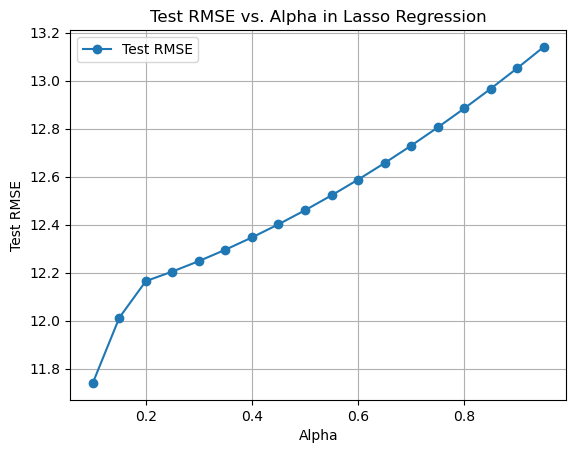

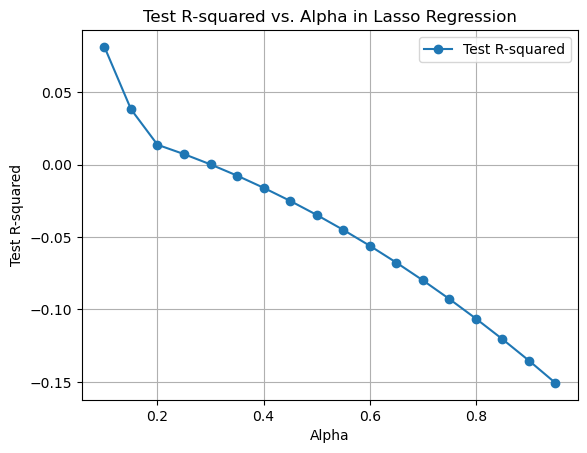

In [112]:
# Now lets try Lasso Regression MODEL - 2
from sklearn.linear_model import Lasso

rmse_test_errors = []
r2_test_errors = []

alpha_values = np.arange(0.1, 1, 0.05)
for a in alpha_values:
    lasso_model = Lasso(alpha=a, max_iter=1000, tol=3)
    lasso_model.fit(X_train_normalized, y_train)

    # Predict
    lasso_train_predict = lasso_model.predict(X_train_normalized)
    lasso_test_predict = lasso_model.predict(X_test_normalized)

    # Calculate test RMSE and test R-squared
    test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_predict))
    test_r2 = r2_score(y_test, lasso_test_predict)

    # Append test RMSE and test R-squared to our lists
    rmse_test_errors.append(test_rmse)
    r2_test_errors.append(test_r2)

# Plot the test RMSE
plt.plot(alpha_values, rmse_test_errors, label='Test RMSE', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs. Alpha in Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# Plot the test R-squared
plt.plot(alpha_values, r2_test_errors, label='Test R-squared', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Test R-squared')
plt.title('Test R-squared vs. Alpha in Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()

# This shows that a smaller alpha is best for our purposes

In [116]:
# Final Lasso Regression Model, use a smaller alpha as shown in previous cell 
lasso_model = Lasso(alpha=0.02, max_iter=1000, tol=3)
lasso_model.fit(X_train_normalized, y_train)

# Predict our values
lasso_train_predict = lasso_model.predict(X_train_normalized)
lasso_test_predict = lasso_model.predict(X_test_normalized)

In [117]:
# Next lets apply cross-validation to check whether our Lasso regression outperforms our linear regression
from sklearn.model_selection import TimeSeriesSplit

train_rmse_list_LR = []
test_rmse_list_LR = []
train_r2_list_LR = []
test_r2_list_LR = []

train_rmse_list_Lasso = []
test_rmse_list_Lasso = []
train_r2_list_Lasso = []
test_r2_list_Lasso = []

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(data):
    # Get our data splits
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    X_train, y_train = train[['demand', 'capacity', 'time']], train['price']
    X_test, y_test = test[['demand', 'capacity', 'time']], test['price']
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    # Predict
    train_predict_LR = model_LR.predict(X_train_normalized)
    test_predict_LR = model_LR.predict(X_test_normalized)
    
    train_predict_Lasso = lasso_model.predict(X_train_normalized)
    test_predict_Lasso = lasso_model.predict(X_test_normalized)
    
    # Calculate our errors
    # RMSE
    train_mse_LR = mean_squared_error(y_train, train_predict_LR)
    test_mse_LR = mean_squared_error(y_test, test_predict_LR)
    train_rmse_LR = np.sqrt(train_mse_LR)
    test_rmse_LR = np.sqrt(test_mse_LR)
    
    train_mse_Lasso = mean_squared_error(y_train, train_predict_Lasso)
    test_mse_Lasso = mean_squared_error(y_test, test_predict_Lasso)
    train_rmse_Lasso = np.sqrt(train_mse_Lasso)
    test_rmse_Lasso = np.sqrt(test_mse_Lasso)


    # R-Squared
    train_r2_LR = r2_score(y_train, train_predict_LR)
    test_r2_LR = r2_score(y_test, test_predict_LR)
    
    train_r2_Lasso = r2_score(y_train, train_predict_Lasso)
    test_r2_Lasso = r2_score(y_test, test_predict_Lasso)
    
    # Append errors to our lists
    train_rmse_list_LR.append(train_rmse_LR)
    test_rmse_list_LR.append(test_rmse_LR)
    train_r2_list_LR.append(train_r2_LR)
    test_r2_list_LR.append(test_r2_LR)
    
    train_rmse_list_Lasso.append(train_rmse_Lasso)
    test_rmse_list_Lasso.append(test_rmse_Lasso)
    train_r2_list_Lasso.append(train_r2_Lasso)
    test_r2_list_Lasso.append(test_r2_Lasso)

# Calculate the average of our errors
avg_train_rmse_LR = np.mean(train_rmse_list_LR)
avg_test_rmse_LR = np.mean(test_rmse_list_LR)
avg_train_r2_LR = np.mean(train_r2_list_LR)
avg_test_r2_LR = np.mean(test_r2_list_LR)

avg_train_rmse_Lasso = np.mean(train_rmse_list_Lasso)
avg_test_rmse_Lasso = np.mean(test_rmse_list_Lasso)
avg_train_r2_Lasso = np.mean(train_r2_list_Lasso)
avg_test_r2_Lasso = np.mean(test_r2_list_Lasso)

print('Average Train RMSE (LR):', avg_train_rmse_LR)
print('Average Test RMSE (LR):', avg_test_rmse_LR)
print('Average Train R-Squared (LR): ', avg_train_r2_LR)
print('Average Test R-Squared (LR): ', avg_test_r2_LR)

print()

print('Average Train RMSE (Lasso):', avg_train_rmse_Lasso)
print('Average Test RMSE (Lasso):', avg_test_rmse_Lasso)
print('Average Train R-Squared (Lasso): ', avg_train_r2_Lasso)
print('Average Test R-Squared (Lasso): ', avg_test_r2_Lasso)

Average Train RMSE (LR): 13.909457944137424
Average Test RMSE (LR): 13.730659973547944
Average Train R-Squared (LR):  0.13514303785624904
Average Test R-Squared (LR):  0.11455504405927083

Average Train RMSE (Lasso): 13.915289644517404
Average Test RMSE (Lasso): 13.853840243219295
Average Train R-Squared (Lasso):  0.14150794472910516
Average Test R-Squared (Lasso):  0.10799311757762602


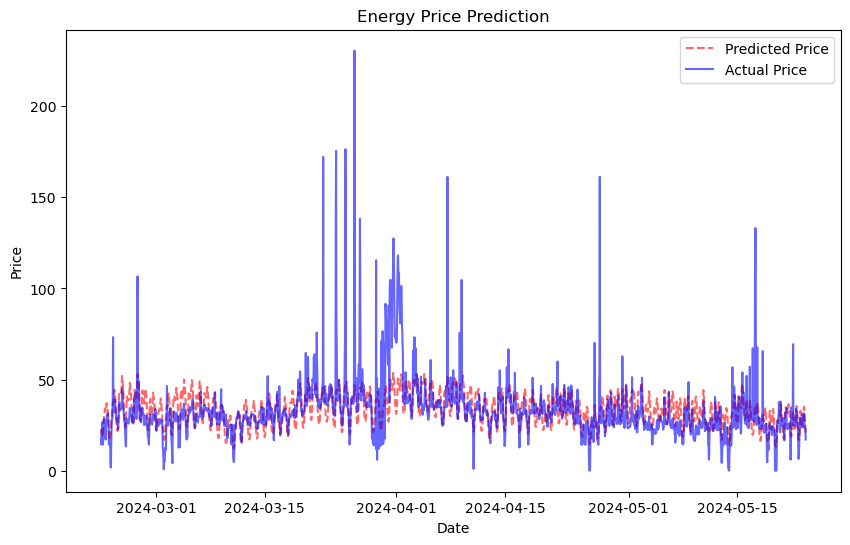

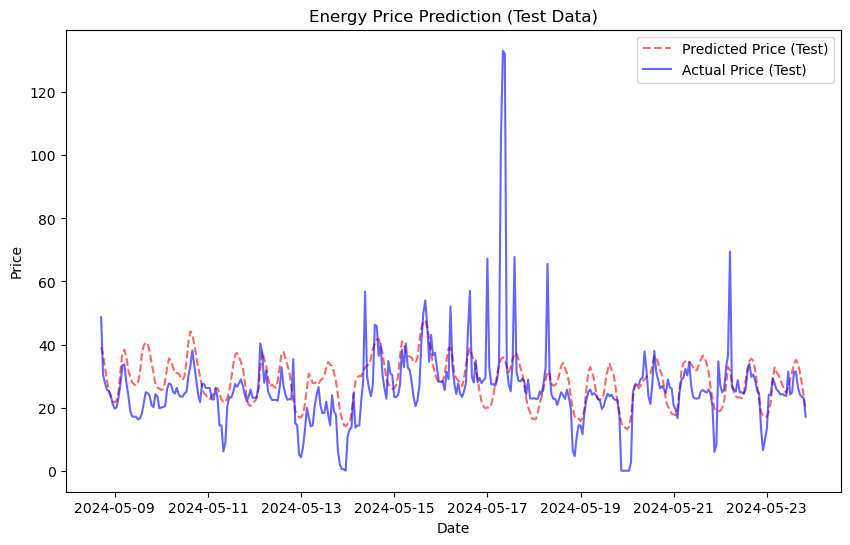

In [115]:
# Lasso and LR have very close error results but LR has a smaller Test RMSE 
# and a slightly larger R-Squred value, therefore let us use LR as our model

# Lets plot our LR model
# Concatenate the predicted values for training and testing sets
predicted_values = np.concatenate((train_predict_LR, test_predict_LR))

start_date = data.index[-len(test_predict_LR)]
date_range = np.arange(start_date, start_date + pd.Timedelta(hours=len(predicted_values)), dtype='datetime64[h]')
y_values = data['price'].to_numpy()

# Plot the predicted and actual values against date
plt.figure(figsize=(10, 6))
plt.plot(date_range, predicted_values, label='Predicted Price', color='red', linestyle='--', alpha=0.6)
plt.plot(date_range, y_values, label='Actual Price', color='blue', alpha=0.6)
plt.title('Energy Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot only the test part of the predicted and actual values against date
plt.figure(figsize=(10, 6))
plt.plot(date_range[-len(test_predict_LR):], test_predict_LR, label='Predicted Price (Test)', color='red', linestyle='--', alpha=0.6)
plt.plot(date_range[-len(test_predict_LR):], y_values[-len(test_predict_LR):], label='Actual Price (Test)', color='blue', alpha=0.6)
plt.title('Energy Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()